In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from xgboost import XGBRegressor
import shap
from IPython.display import display # Import display

# read the csv file and load first 5 rows in the platform
# Using 'TARIKH HEADING' as the index column as requested
df = pd.read_csv("/content/datasetPadi.csv",
                 index_col='TARIKH HEADING')

# Display the head of the dataframe
print("DataFrame head:")
display(df.head())

DataFrame head:


,Tahun,Musim,NDVI_BOHOR,TMIN_All,TMAX_All,TBase_All,TotalGDD,GDD_Cummulative,RAIN1,TotalSRAD,SRAD_Commulative,SOIL_pH,SOIL_CEC (meq/100),SOIL_OC,Fertilizer_N,Fertilizer_P,Fertilizer_K,Hasil Kasar,Predicted Hasil (experimental)
TARIKH HEADING,,,,,,,,,,,,,,,,,,,
21/06/2019,2019,1,0.78386,2691.0,3195.3,19.5,1971.15,107986.15,679.8,1952.0,105441.6,4.08,18.27,1.57,104.3,42,62,4.04,4.98
28/12/2019,2019,2,0.78250,2432.1,3216.2,19.5,1861.15,100391.95,445.5,1946.7,99669.1,4.08,18.27,1.57,104.3,42,62,5.01,0.19
20/07/2020,2020,1,0.88023,2670.1,3173.9,19.5,1950.00,106220.95,934.9,1905.8,101788.1,4.08,18.27,1.57,104.3,42,62,6.36,2.92
12/12/2020,2020,2,0.77024,2479.9,3147.9,19.5,1841.90,101152.75,988.9,1701.5,89309.2,4.08,18.27,1.57,104.3,42,62,6.30,0.84
20/07/2021,2021,1,0.64940,2677.1,3205.1,19.5,1969.10,108298.80,740.8,1950.7,107517.9,4.08,18.27,1.57,104.3,42,62,5.34,4.11


In [ ]:
# print the metadata of the dataset
df.info()

# data description
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 21/06/2019 to 18/08/2024
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tahun                           11 non-null     int64  
 1   Musim                           11 non-null     int64  
 2   NDVI_BOHOR                      11 non-null     float64
 3   TMIN_All                        11 non-null     float64
 4   TMAX_All                        11 non-null     float64
 5   TBase_All                       11 non-null     float64
 6   TotalGDD                        11 non-null     float64
 7   GDD_Cummulative                 11 non-null     float64
 8   RAIN1                           11 non-null     float64
 9   TotalSRAD                       11 non-null     float64
 10  SRAD_Commulative                11 non-null     float64
 11  SOIL_pH                         11 non-null     float64
 12  SOIL_CEC (meq/100)        

,Tahun,Musim,NDVI_BOHOR,TMIN_All,TMAX_All,TBase_All,TotalGDD,GDD_Cummulative,RAIN1,TotalSRAD,SRAD_Commulative,SOIL_pH,SOIL_CEC (meq/100),SOIL_OC,Fertilizer_N,Fertilizer_P,Fertilizer_K,Hasil Kasar,Predicted Hasil (experimental)
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,1.100000e+01,11.00,1.100000e+01,11.0,11.0,11.000000,11.000000
mean,2021.272727,1.454545,0.810988,2594.954545,3195.636364,19.5,1923.295455,104949.431818,766.318182,1869.627273,99286.254545,4.080000e+00,1.827000e+01,1.57,1.043000e+02,42.0,62.0,5.339091,2.564545
std,1.678744,0.522233,0.082014,109.762255,42.198371,0.0,58.398632,3423.630733,193.849575,97.169883,6921.397743,9.315294e-16,3.726118e-15,0.00,2.980894e-14,0.0,0.0,0.792041,1.790901
min,2019.000000,1.000000,0.649400,2432.100000,3147.600000,19.5,1837.450000,100391.950000,438.500000,1701.500000,88514.700000,4.080000e+00,1.827000e+01,1.57,1.043000e+02,42.0,62.0,4.040000,0.190000
25%,2020.000000,1.000000,0.776370,2490.050000,3178.950000,19.5,1863.275000,101264.975000,682.800000,1798.500000,94078.650000,4.080000e+00,1.827000e+01,1.57,1.043000e+02,42.0,62.0,4.985000,0.970000
50%,2021.000000,1.000000,0.834340,2670.100000,3192.400000,19.5,1950.000000,106220.950000,761.800000,1905.800000,101108.800000,4.080000e+00,1.827000e+01,1.57,1.043000e+02,42.0,62.0,5.090000,2.920000
75%,2022.500000,2.000000,0.876585,2685.950000,3200.200000,19.5,1970.125000,108096.550000,929.750000,1948.700000,104649.400000,4.080000e+00,1.827000e+01,1.57,1.043000e+02,42.0,62.0,5.820000,4.210000
max,2024.000000,2.000000,0.898800,2708.500000,3305.400000,19.5,1979.750000,108509.250000,988.900000,1973.500000,107517.900000,4.080000e+00,1.827000e+01,1.57,1.043000e+02,42.0,62.0,6.680000,4.980000


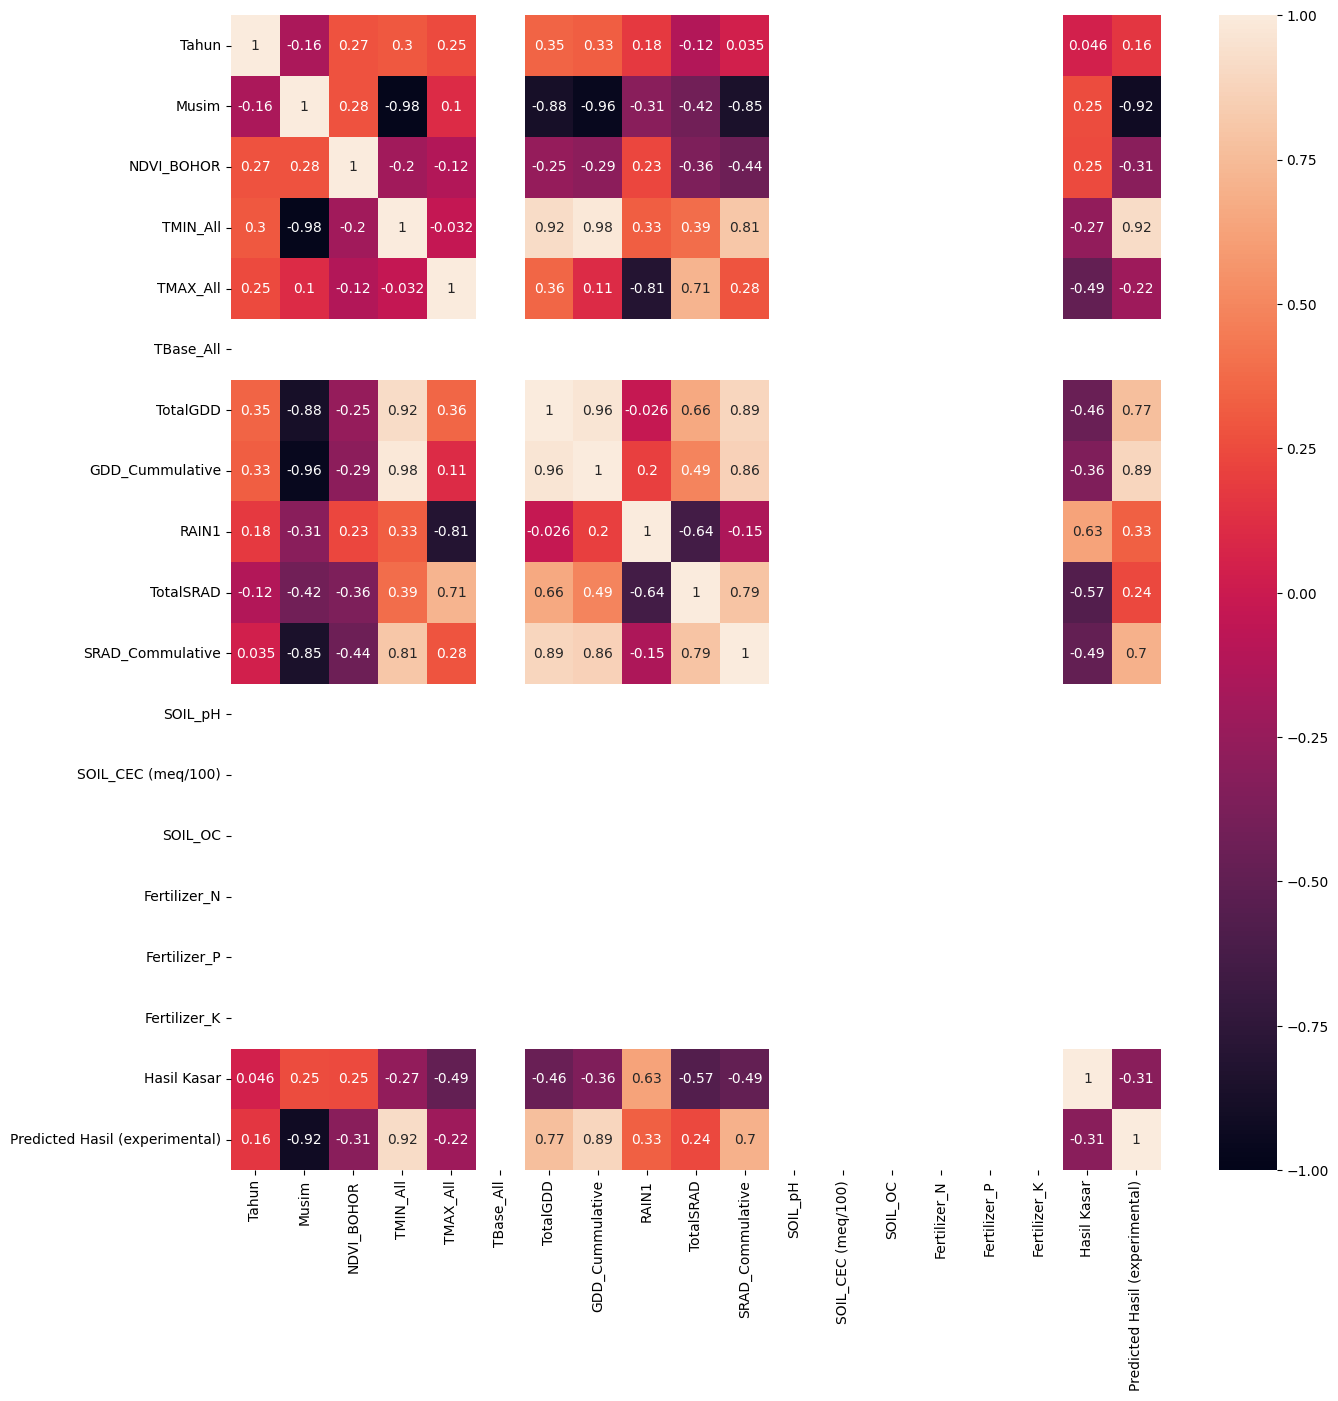

In [ ]:
# create featureset and target variable from the dataset
features_df = df.drop('Hasil Kasar', axis=1)
tar = df['Hasil Kasar']

# plot the heatmap from the dataset
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()


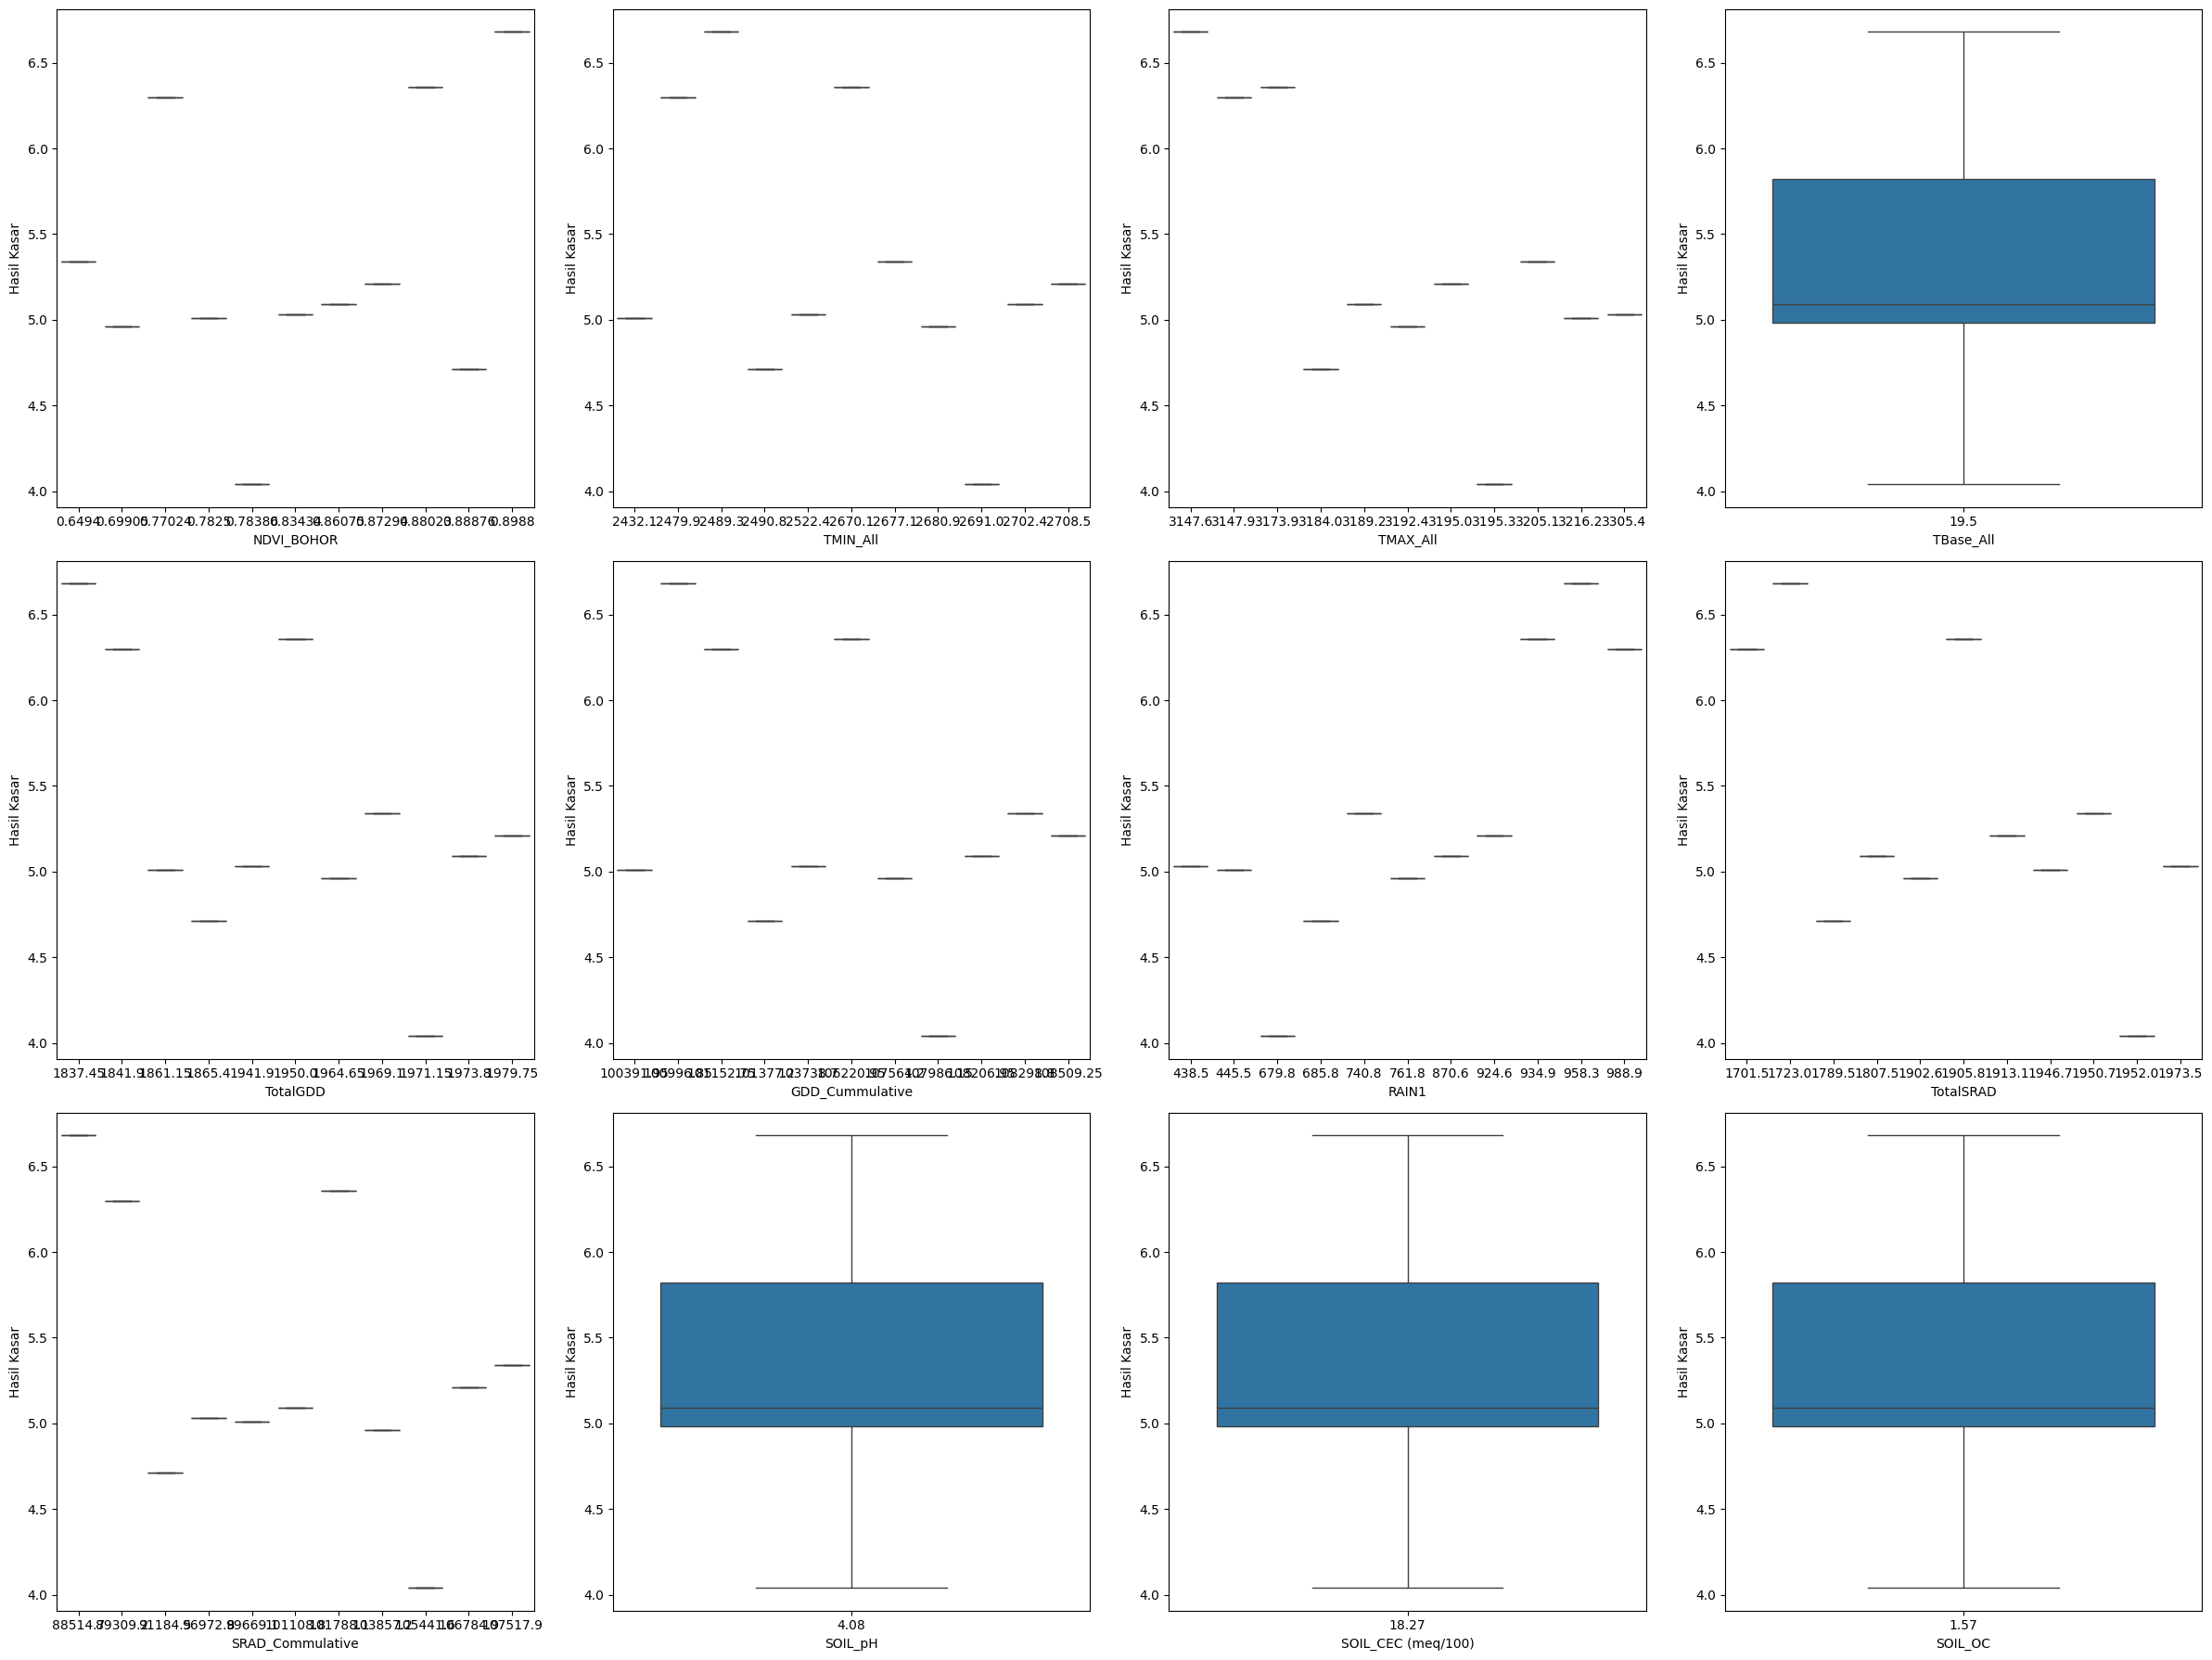

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical features
selected_features = ['NDVI_BOHOR', 'TMIN_All', 'TMAX_All', 'TBase_All',
                     'TotalGDD', 'GDD_Cummulative', 'RAIN1', 'TotalSRAD',
                     'SRAD_Commulative', 'SOIL_pH', 'SOIL_CEC (meq/100)', 'SOIL_OC']

# Create subplots: 3 rows x 4 columns
fig, ax = plt.subplots(3, 4, figsize=(24, 18))

# Plot each feature
for e, col in enumerate(selected_features):
    row = e // 4
    col_pos = e % 4
    sns.boxplot(data=df, x=col, y='Hasil Kasar', ax=ax[row, col_pos])

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load and format dataset
df_raw = pd.read_csv("datasetPadi.csv", header=None)
df = df_raw.iloc[1:13].copy()
df.columns = df_raw.iloc[0]  # Set first row as header

# Define features and target
features = [
    'Fertilizer_N', 'Fertilizer_P', 'Fertilizer_K',
    'SOIL_OC', 'TMIN_All', 'TMAX_All',
    'TotalGDD', 'GDD_Cummulative', 'RAIN1', 'NDVI_BOHOR'
]
target = 'Hasil Kasar'

# Filter and convert to float
df = df[features + [target]].dropna()
X = df[features].astype(float)
y = df[target].astype(float)

# Apply Linear Regression with Leave-One-Out Cross Validation
loo = LeaveOneOut()
model = LinearRegression()
y_true, y_pred = [], []

for train_idx, test_idx in loo.split(X):
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred.append(model.predict(X.iloc[test_idx])[0])
    y_true.append(y.iloc[test_idx].values[0])

print("Linear Regression")
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))  # Manual RMSE
print("R²:", r2_score(y_true, y_pred))


Linear Regression
MAE: 1.3310790565467783
RMSE: 1.7106446185643374
R²: -4.131175261553286


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)  # Try k=1 and k=3
y_true, y_pred = [], []

for train_idx, test_idx in loo.split(X):
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred.append(model.predict(X.iloc[test_idx])[0])
    y_true.append(y.iloc[test_idx].values[0])

print("KNN Regression")
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))  # Manual RMSE
print("R²:", r2_score(y_true, y_pred))


KNN Regression
MAE: 0.8336363636363638
RMSE: 0.9533328035599294
R²: -0.5936257257399424


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

best_score = -np.inf
best_params = None

for k in range(1, 6):
    for weight in ['uniform', 'distance']:
        model = KNeighborsRegressor(n_neighbors=k, weights=weight)
        y_true, y_pred = [], []

        for train_idx, test_idx in LeaveOneOut().split(X):
            model.fit(X.iloc[train_idx], y.iloc[train_idx])
            y_pred.append(model.predict(X.iloc[test_idx])[0])
            y_true.append(y.iloc[test_idx].values[0])

        r2 = r2_score(y_true, y_pred)
        if r2 > best_score:
            best_score = r2
            best_params = (k, weight)

print("Best KNN Parameters:")
print("k =", best_params[0], ", weights =", best_params[1])
print("R² =", best_score)


Best KNN Parameters:
k = 5 , weights = distance
R² = -0.30168966916539586


In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=2)  # Keep it shallow
y_true, y_pred = [], []

for train_idx, test_idx in loo.split(X):
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred.append(model.predict(X.iloc[test_idx])[0])
    y_true.append(y.iloc[test_idx].values[0])

print("Decision Tree Regression")
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))  # Manual RMSE
print("R²:", r2_score(y_true, y_pred))


Decision Tree Regression
MAE: 0.5016666666666668
RMSE: 0.6284695616328525
R²: 0.30742668372149506


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

best_score = -np.inf
best_params = None

for depth in range(1, 6):
    for leaf in [1, 2]:
        model = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=leaf)
        y_true, y_pred = [], []

        for train_idx, test_idx in LeaveOneOut().split(X):
            model.fit(X.iloc[train_idx], y.iloc[train_idx])
            y_pred.append(model.predict(X.iloc[test_idx])[0])
            y_true.append(y.iloc[test_idx].values[0])

        r2 = r2_score(y_true, y_pred)
        if r2 > best_score:
            best_score = r2
            best_params = (depth, leaf)

print("Best Decision Tree Parameters:")
print("max_depth =", best_params[0], ", min_samples_leaf =", best_params[1])
print("R² =", best_score)


Best Decision Tree Parameters:
max_depth = 2 , min_samples_leaf = 1
R² = 0.2999778864475624


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import requests
from sklearn.tree import DecisionTreeRegressor

# === 1. Load & Train Model ===
df_raw = pd.read_csv("/content/datasetPadi.csv", header=None)
df = df_raw.iloc[1:13].copy()
df.columns = df_raw.iloc[0]

features = [
    'Fertilizer_N', 'Fertilizer_P', 'Fertilizer_K',
    'SOIL_OC', 'TMIN_All', 'TMAX_All',
    'TotalGDD', 'GDD_Cummulative', 'RAIN1', 'NDVI_BOHOR'
]
target = 'Hasil Kasar'

df = df[features + [target]].dropna()
X = df[features].astype(float)
y = df[target].astype(float)

model = DecisionTreeRegressor(max_depth=2)
model.fit(X, y)

# === 2. Prediction Function ===
def predict_yield(location, crop_size):
    API_KEY = "1b5eec240e954be696a1f8177dbf9c53"
    url = f"http://api.openweathermap.org/data/2.5/weather?q={location}&appid={API_KEY}&units=metric"

    try:
        response = requests.get(url)
        data = response.json()
        if data.get('cod') != 200:
            return f"❌ Error: {data.get('message', 'Invalid location')}"

        TMIN_All = data['main']['temp_min']
        TMAX_All = data['main']['temp_max']
        RAIN1 = data.get('rain', {}).get('1h', 0.0)

        input_features = {
            'Fertilizer_N': 80,
            'Fertilizer_P': 50,
            'Fertilizer_K': 50,
            'SOIL_OC': 1.5,
            'TMIN_All': TMIN_All,
            'TMAX_All': TMAX_All,
            'TotalGDD': 1700,
            'GDD_Cummulative': 1700,
            'RAIN1': RAIN1,
            'NDVI_BOHOR': 0.65
        }

        X_input = pd.DataFrame([input_features])
        yield_per_ha = model.predict(X_input)[0]
        total_yield = yield_per_ha * crop_size

        return (
            f"📍 Location: {location}\n"
            f"🌾 Predicted yield per hectare: {yield_per_ha:.2f} tons\n"
            f"📦 Total estimated yield for {crop_size} ha: {total_yield:.2f} tons"
        )

    except Exception as e:
        return f"❌ Error: {str(e)}"

# === 3. Gradio Web Interface ===
iface = gr.Interface(
    fn=predict_yield,
    inputs=[
        gr.Textbox(label="🌍 Enter Location (City or City,Country)"),
        gr.Number(label="🌾 Crop Size (in Hectares)", value=1.0)
    ],
    outputs="text",
    title="🌾 Rice Yield Predictor",
    description="Enter a location and crop size. The system will fetch real-time weather data to estimate rice yield."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0cbb9aa8138325b6be.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import requests

API_KEY = "4714913e6471729bb49ad5420035e61c"
city = "Alor Setar"
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"

res = requests.get(url)
print(res.status_code)
print(res.json())
